In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.tools.visualization import plot_histogram
from IPython.display import display, Math, Latex

# Introduction to Quantum Computing

## Why Quantum Computing ?

In 1981, the Nobel laureate Richard Feynman asked, “What kind of computer are we going to use to simulate physics?”

*Nature isn’t classical, dammit, and if you want to make a simulation of Nature, you’d better make it quantum mechanical, and by golly it’s a wonderful problem, because it doesn’t look so easy.*

Richard Feynman speech can be used to see how powerful quantum computing could be to let us understand more about our universe, since quantum physics try to explain and understand how our universe is built from the deepest subatomic dimensions to huge macroscopic phenomena. What can lead us to ask ourselves if our classical compurters are going to be able to solve and deal with problems that nature by essence shows to be a quantum complex behavior, that most likely are exponential problems for our classical computers, like the protein folding process, where dealing with several amino acids combinations we've that as the size of our amino acids basis grows the dimesion of our problem grows exponencially, what is impossible for a classical computer to solve nowdays.

So the question is, how quantum computers could solve these kind of problems some day ? With a different model of treating information closer with how our universe and nature behave, from the deepest levels and beyond.

### Classical Bit vs Qubit

Our classical computers, those that we've in home, desktops, notebooks, cellphones all of them in the deepest level stores the information as different sequences of **0s** and **1s**, so as **0100100100** where each entrie is either 0 or either 1. What makes a huge difference when we compare it with how the quantum computers stores information and work with it, where a state 0 or 1 can be seen as a unitary vector state $|\psi\rangle$ in a Hilbert space $\mathcal{H}$ or a Qubit, in the computational basis, defined as:


$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta\left|1\right\rangle$$

$$|\alpha|^2 + |\beta|^2 = 1$$


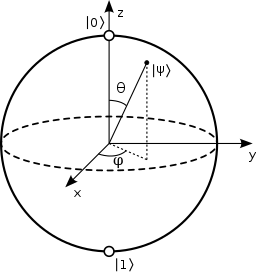





Where the scalars alpha and beta are used to see the amplitude of each state, or more generally, its probability to colapse over its respective state $|0\rangle$ or $|1\rangle$, which is like we could have all possible states at the same time, but we can only measure and see a small piece of this huge information.

### Quantum Superpostion and Entanglement

As we're dealing with quantum behavior some pretty important features of quantum mechanics that are used in quantum computing are the **Quantum Superposition** and the **Quantum Entanglement**. If were given to us a state $\psi$, when neither of its constants, lets say for example $\alpha$ and $\beta$, are null, we say that this state is in **superpostion**. More generally, which means that before a potential measure a phisical system is partially over all possible existants theoretical states.

$$
|\psi\rangle = a_0|0\rangle + a_1|1\rangle + \dots + a_{n-1}|n-1 \rangle = \sum_{i=0}^{n-1}a_i|i\rangle
$$

$$
\sum_{i = 0}^{n-1} |a_i|^2 = 1
$$

However when we measure it, it colapses to a unique state, so its like nature is doing a massive work, but it is willing to share with us just a small piece of it, a hint, for us to solve some very difficult problems.

The space of these vector states can be seen by tensor product of this system states, so if we've **n** components we can write those as 

$$
\begin{align*}
|\Psi\rangle &= |\psi_0\rangle \otimes |\psi_1\rangle \otimes \dots \otimes |\psi_{n-1}\rangle\\
             &= |\psi_0\rangle |\psi_1\rangle \dots |\psi_{n-1}\rangle\\
             &= |\psi_0 \psi_1 \dots \psi_{n-1}\rangle
\end{align*}
$$

If a state can not be writen by the tensor product of other states we've that this states is **entangled**, so as the wellknown Bell-State


$$
\begin{align*}
|\Psi\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
\end{align*}
$$


Where if we measure one of the Qubits we know exactly the state of the other, even if the other Qubit is in the other side of the galaxy, with is forbidden by the theory of relativity, since it would be faster then the speed of light, which is known as the *EPR Paradox*.

### Programming with Quantum Gates

While Classical Computers works with simple boolean operators like *NOT, NAND, XOR, AND, OR*, Quantum Computers works with Quantum Gates, which mathematically speaking are unitary operators, that manipulates our state, so let $\mathcal{U}$ be our unitary operator and $|\psi\rangle$ our qubit.

$$
UU^\dagger = I
$$

$$
|\psi\rangle \rightarrow \mathcal{U}|\psi\rangle
$$

$$
|||\psi\rangle|| = ||\mathcal{U}|\psi\rangle|| = 1
$$

In this context the gates that we'll use are those that work in an unique qubit, therefore our operators will be defined by $M_{2x2}$ matrices over a state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, and some of those operators are the Pauli Matrices, which besides its importance all over quantum computing, they are going to have a great importance to the understanding of the Deutsch-Jozsa Algorithm.


$$
\sigma_I = I = \begin{bmatrix}
                1 & 0 \\
                0 & 1
               \end{bmatrix}
$$

$$
\sigma_X = X = \begin{bmatrix}
                0 & 1 \\
                1 & 0
               \end{bmatrix}
$$

$$
\sigma_Y = Y = \begin{bmatrix}
                0 & -i \\
                i & 0
               \end{bmatrix}
$$

$$
\sigma_Z = Z = \begin{bmatrix}
                1 & 0 \\
                0 & -1
               \end{bmatrix}
               \\
$$

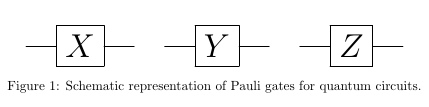


As we already settled superposition is a important feature in quantum computing, how we can solve problems over multiple states at the same time, so if we've a state $|0\rangle$ or $|1\rangle$ and want to put it on superposition we can apply we one of the most common and important quantum gates, the Hadarmard Gate, given by the matrix

$$
\begin{align*}
H &= \frac{1}{\sqrt{2}} \begin{bmatrix}
                       1 & 1\\
                       1 & -1
                       \end{bmatrix}
\end{align*}
$$


Hence, if we apply this matrix on the states $|0\rangle$ or $|1\rangle$ we'll get the states $|+\rangle$ and $|-\rangle$ respectively



$$
\begin{align*}
\\H|0\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}
                                   1 & 1\\
                                   1 & -1
                                \end{bmatrix} 
                                %
             \begin{bmatrix}
             1 \\
             0
             \end{bmatrix}
             =
             \frac{|0\rangle + |1\rangle}{\sqrt{2}}
             =
             |+\rangle
\\\\H|1\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix}
                                   1 & 1\\
                                   1 & -1
                                \end{bmatrix} 
                                %
             \begin{bmatrix}
             0 \\
             1
             \end{bmatrix}
             =
             \frac{|0\rangle - |1\rangle}{\sqrt{2}}
             =
             |-\rangle
\end{align*}
$$

Which are the resultant states after we put them on superposition. And since $H$ = $H^\dagger$, when we apply $HH^\dagger|\psi\rangle = HH^\dagger|\psi\rangle = |\psi\rangle $, it restores it to the original input state.

This notebook will be updated soon!!!! 